In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df

,From Date,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,COy1,Ozoney1,...,Ozone,RH,WS,WD,SR,BP,AT,year,month,day
0,735966,318.998571,480.381429,159.387143,95.130000,302.424286,82.168571,39.745714,2.932857,46.822857,...,55.380000,60.705714,0.887143,167.552857,61.578571,736.275714,12.331429,2016,1,3
1,735973,289.505714,472.055714,228.792857,84.445714,387.365714,92.285714,40.324286,5.032857,45.618571,...,37.230000,70.215714,0.842857,218.824286,56.858571,733.617143,12.807143,2016,1,10
2,735980,194.122857,341.192857,73.390000,73.867143,165.957143,59.112857,25.532857,2.041429,52.710000,...,56.340000,69.085714,1.155714,195.938571,60.500000,734.085714,11.747143,2016,1,17
3,735987,245.710000,434.321429,72.510000,88.392857,177.928571,56.801429,28.978571,2.494286,69.548571,...,69.467143,74.524286,0.992857,195.488571,58.688571,734.132857,8.005714,2016,1,24
4,735994,200.511429,430.995714,154.150000,100.797143,300.324286,66.545714,35.051429,3.425714,49.100000,...,49.721429,66.011429,0.885714,191.221429,67.075714,733.885714,12.675714,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737394,190.887143,351.001429,150.995714,101.784286,182.934286,41.087143,7.274286,2.272857,27.704286,...,33.955714,65.341429,0.708571,182.577143,68.381429,971.778571,15.910000,2019,12,1
204,737401,234.834286,415.775714,185.720000,107.428571,220.201429,40.914286,6.067143,2.631429,25.794286,...,30.771429,63.680000,0.488571,202.080000,75.555714,972.078571,12.905714,2019,12,8
205,737408,198.044286,325.415714,115.980000,84.142857,147.455714,39.132857,12.660000,2.165000,34.307143,...,29.844286,71.202857,0.722857,175.794286,62.701429,972.037143,17.242857,2019,12,15
206,737415,281.095714,430.512857,148.477143,102.625714,184.412857,42.044286,21.525714,2.811429,101.102857,...,21.508571,78.275714,0.567143,202.740000,49.167143,971.940000,12.917143,2019,12,22


In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
Y1 = df['PM2.5']

In [9]:
X1

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,COy3,WSy3,ATy3,year,month,day
0,318.998571,480.381429,159.387143,95.130000,302.424286,82.168571,2.932857,0.738571,11.824286,338.317143,...,121.173333,45.755000,225.991667,88.853333,22.285000,1.020000,8.133333,2016,1,3
1,289.505714,472.055714,228.792857,84.445714,387.365714,92.285714,5.032857,0.877143,13.141429,264.994286,...,69.601429,68.111429,159.321429,67.077143,2.450000,1.522857,12.375714,2016,1,10
2,194.122857,341.192857,73.390000,73.867143,165.957143,59.112857,2.041429,1.158571,11.251429,207.880000,...,163.557143,61.645714,286.550000,84.970000,2.822857,1.152857,14.240000,2016,1,17
3,245.710000,434.321429,72.510000,88.392857,177.928571,56.801429,2.494286,1.058571,7.750000,253.907143,...,151.974286,98.222857,300.505714,91.982857,2.437143,1.272857,13.058571,2016,1,24
4,200.511429,430.995714,154.150000,100.797143,300.324286,66.545714,3.425714,0.898571,13.387143,178.515714,...,208.472857,94.730000,376.922857,86.567143,2.988571,0.875714,16.388571,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,190.887143,351.001429,150.995714,101.784286,182.934286,41.087143,2.272857,0.580000,15.205714,215.644286,...,102.611429,94.672857,224.481429,32.228571,2.871429,1.098571,17.872857,2019,12,1
204,234.834286,415.775714,185.720000,107.428571,220.201429,40.914286,2.631429,0.497143,12.808571,268.005714,...,183.327143,100.610000,340.050000,52.100000,3.421429,0.620000,15.171429,2019,12,8
205,198.044286,325.415714,115.980000,84.142857,147.455714,39.132857,2.165000,0.661429,11.738571,221.065714,...,109.684286,98.288571,237.367143,45.397143,3.351429,0.667143,13.330000,2019,12,15
206,281.095714,430.512857,148.477143,102.625714,184.412857,42.044286,2.811429,0.601429,9.582857,148.317857,...,149.338571,86.021429,280.600000,48.005714,3.334286,0.777143,12.785714,2019,12,22


In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=7)

In [17]:
forest = RandomForestRegressor(n_estimators=2000,
                              max_depth=12,
                              max_features='auto',
                              min_samples_split=2,
                              min_samples_leaf=3,random_state=42)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, n_estimators=2000,
                      random_state=42)

In [18]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8674880057273138

Score on test data: 0.6868587165155349

Root Mean Squared Error: 48.83880206333016

Overall model accuracy: 0.6868587165155349


In [19]:
test=data.loc['207':'259']
X=test[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,COy3,WSy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,0.645714,8.394286,217.428571,...,100.627143,83.730000,212.015714,56.007143,2.998571,1.072857,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,0.671429,8.800000,264.292857,...,98.832857,67.225714,194.864286,57.234286,3.004286,0.885714,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,0.888571,11.971429,191.864286,...,101.944286,57.842857,190.755714,48.108571,2.867143,0.792857,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,0.818571,9.905714,237.660000,...,94.412857,75.028571,195.770000,43.388571,2.740000,0.822857,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,0.965714,10.632857,173.172857,...,49.015714,68.434286,127.910000,44.487143,1.844286,0.955714,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,1.020000,9.834286,143.550000,...,74.012857,62.091429,156.391429,42.347143,2.127143,1.098571,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,1.088571,11.920000,193.068571,...,153.021429,66.960000,268.622857,39.584286,2.754286,1.011429,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,0.791429,13.324286,109.957143,...,50.672857,67.874286,129.678571,30.340000,1.890000,1.112857,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,1.167143,15.858571,166.732857,...,34.234286,82.401429,120.168571,37.265714,1.715714,1.247143,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,0.940000,12.517143,109.975714,...,38.925714,62.438571,108.778571,26.370000,1.704286,1.481429,17.097143,2020,3,1


In [20]:
predict=forest.predict(X)

In [21]:
predict

array([170.94005353, 152.09165995, 123.55541895, 180.59559554,
       116.93983255, 101.69082205, 143.90920254,  95.9976813 ,
       115.74857704,  98.86690339,  90.28966689,  86.07742027,
        77.6153523 ,  83.84046117,  72.56656147,  68.0342146 ,
        89.1598176 , 105.01858878,  64.9888013 , 100.64738913,
        84.20326325,  90.45279032,  72.8119055 ,  55.4832277 ,
        66.07805703,  78.81770666,  59.09256256,  58.89112622,
        49.48068125,  41.71463201,  38.79976033,  45.17518397,
        45.71670879,  45.72424799,  35.82091136,  40.40042108,
        43.7896642 ,  43.64687557,  43.8281851 ,  58.76366516,
        77.86647725,  85.75599644, 102.97937823, 124.78735707,
        98.74244388, 125.61730426, 209.64082388, 172.27031293,
       186.55563704, 181.48263982, 182.01224228, 146.57996508,
       193.38815376])

In [22]:
dates=data.loc['207':'259','From Date']

In [23]:
dates

207    737422
208    737429
209    737436
210    737443
211    737450
212    737457
213    737464
214    737471
215    737478
216    737485
217    737492
218    737499
219    737506
220    737513
221    737520
222    737527
223    737534
224    737541
225    737548
226    737555
227    737562
228    737569
229    737576
230    737583
231    737590
232    737597
233    737604
234    737611
235    737618
236    737625
237    737632
238    737639
239    737646
240    737653
241    737660
242    737667
243    737674
244    737681
245    737688
246    737695
247    737702
248    737709
249    737716
250    737723
251    737730
252    737737
253    737744
254    737751
255    737758
256    737765
257    737772
258    737779
259    737786
Name: From Date, dtype: int64

In [24]:
X['From Date']=dates.values

In [25]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'WSy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2',
       'WSy2', 'ATy2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3',
       'COy3', 'WSy3', 'ATy3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [26]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [27]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [28]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [29]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

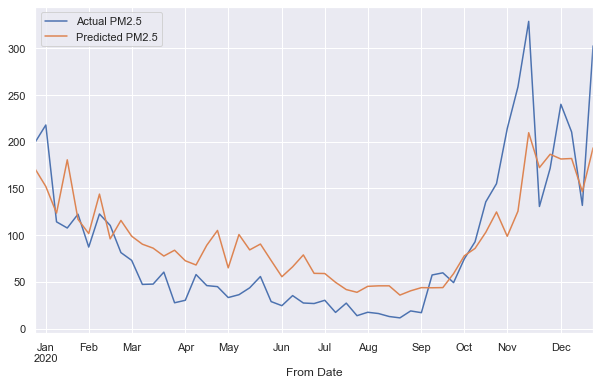

In [30]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [31]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

46.84688248298043

In [32]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 29.182203908728827
MSE: 2385.228586981142
RMSE: 48.83880206333016
R-Squared: 0.6868587165155349


In [33]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 37.2648693034587
MSE: 2194.630398374179
RMSE: 46.84688248298043
R-Squared: 0.6502498047514049


In [34]:
import pickle
filename = 'PM2.5_forest3y.sav'
pickle.dump(forest, open(filename, 'wb'))

In [35]:
#load model
forest = pickle.load(open(filename, 'rb'))
result = forest.score(xtest, ytest)
print(result)

0.6868587165155349


# 3rd plot

In [36]:
testcase = pd.DataFrame()

In [37]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [38]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [39]:
testcase

,test,pred,Corrected
11,85.340000,74.908233,123.747035
128,65.135714,89.244945,40.406143
158,253.915714,190.457332,239.296134
98,219.294286,201.886621,250.725423
131,45.192857,48.405928,-0.432874
22,94.031429,114.022008,65.183206
155,302.818571,196.586355,245.425157
2,192.625714,185.567055,234.405857
24,84.692857,89.303542,40.464740
46,222.504286,209.624643,258.463445


In [48]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [41]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.739241879919885

In [42]:
test2020=pd.DataFrame()

In [43]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [44]:
test2020.index=test.index

In [45]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

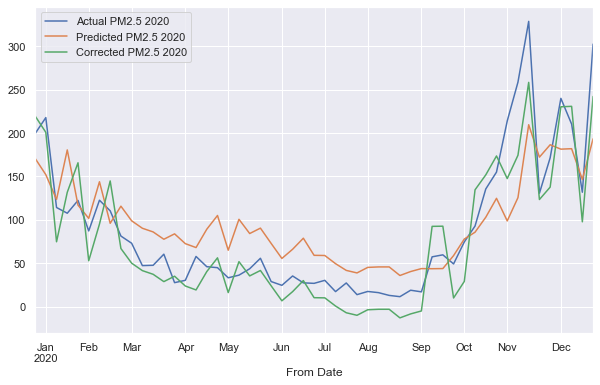

In [46]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [47]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8409528653678209